In [5]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

import statsmodels.api as sm

# World happiness Dataset
Cílem je predikovat `Happiness Score` na základě ostatních vstupních proměných (`Economy (GDP per Capita)`, `Freedom` a další).

URL: https://www.kaggle.com/unsdsn/world-happiness

In [7]:
df_2015 = pd.read_csv(os.path.join('dataset', '2015.csv'))
df_2015.shape

(158, 12)

In [8]:
df_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [9]:
df_2015.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

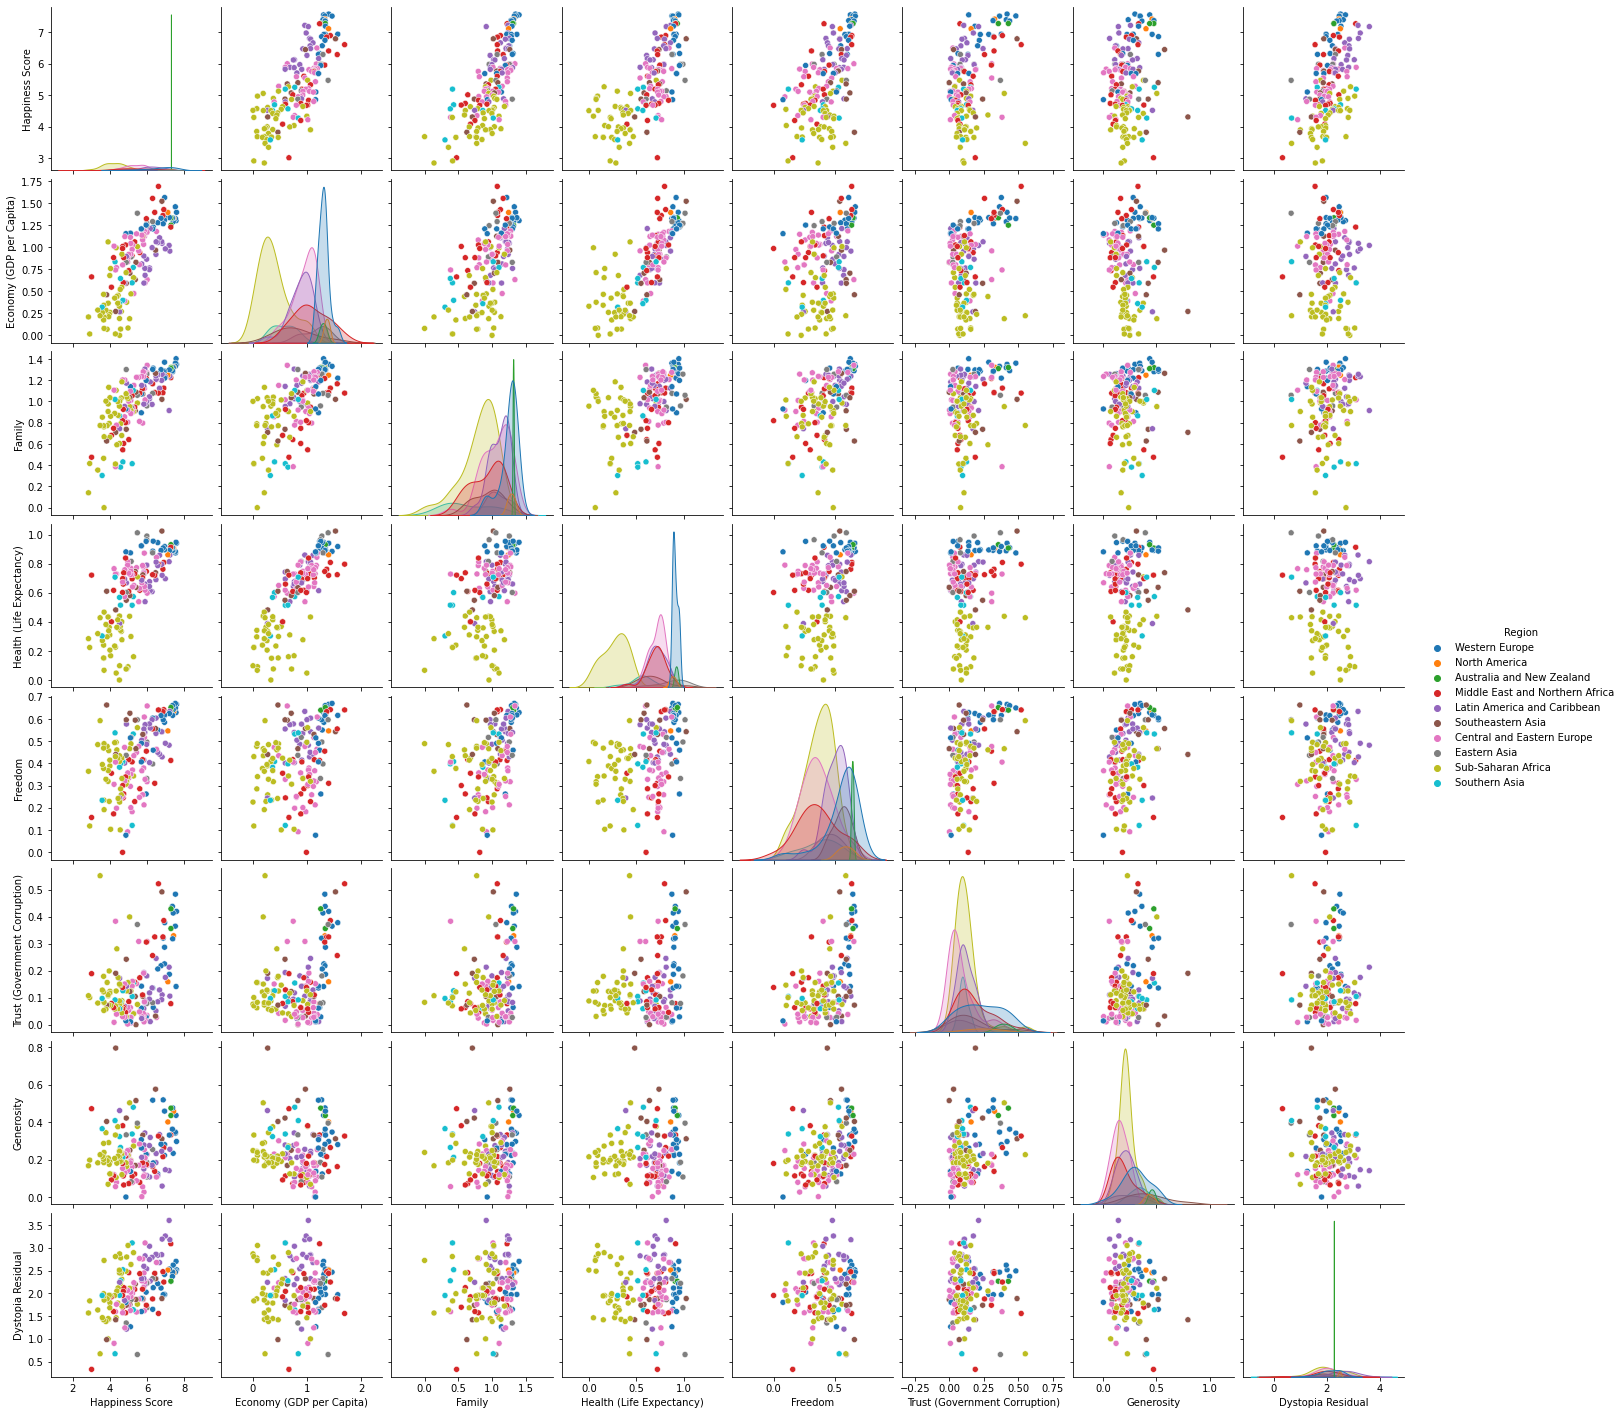

In [10]:
sns.pairplot(df_2015.drop(['Happiness Rank', 'Standard Error'], axis=1), hue='Region')

In [21]:
def linear_regression_experiment(df, target_label):
    train_input_var = df[target_label]
    train_input_target = df['Happiness Score']

    X = sm.add_constant(train_input_var)
    model = sm.OLS(train_input_target, X).fit()

    plot = sns.scatterplot(data=df, x=target_label, y='Happiness Score')
    plot.plot(df[target_label], model.predict(X), color='red', linewidth=2)

    RSE = np.sqrt(1/(len(train_input_var)-2) * np.sum((train_input_var - model.predict(X)) ** 2))

    print("======================================")
    print(f"Residual Standard Error : {RSE}")
    print(f"r-squared statistic: {model.rsquared}")
    print("======================================")

    print("Coefficients/Parameters")
    print(model.params)
    print("--------------------------------------")
    print("t-statistic")
    print(model.tvalues)
    print("--------------------------------------")
    print("p-value")
    print(model.pvalues)
    print("--------------------------------------")
    print("Standard Errors")
    print(model.bse)
    print("--------------------------------------")
    

Residual Standard Error : 4.585085415495043
r-squared statistic: 0.6099071541531227
Coefficients/Parameters
const                       3.498810
Economy (GDP per Capita)    2.218227
dtype: float64
--------------------------------------
t-statistic
const                       26.297788
Economy (GDP per Capita)    15.617452
dtype: float64
--------------------------------------
p-value
const                       3.266714e-59
Economy (GDP per Capita)    1.050538e-33
dtype: float64
--------------------------------------
Standard Errors
const                       0.133046
Economy (GDP per Capita)    0.142035
dtype: float64
--------------------------------------


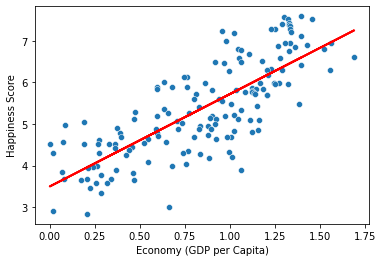

In [22]:
linear_regression_experiment(df_2015, 'Economy (GDP per Capita)')

Residual Standard Error : 5.171891816130058
r-squared statistic: 0.0325147710702397
Coefficients/Parameters
const         4.988999
Generosity    1.629764
dtype: float64
--------------------------------------
t-statistic
const         26.075354
Generosity     2.289710
dtype: float64
--------------------------------------
p-value
const         9.629662e-59
Generosity    2.337872e-02
dtype: float64
--------------------------------------
Standard Errors
const         0.191330
Generosity    0.711777
dtype: float64
--------------------------------------


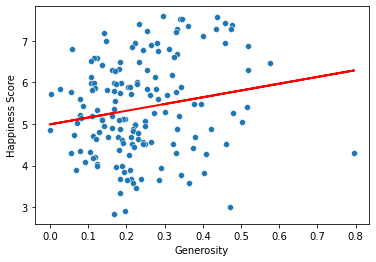

In [23]:
linear_regression_experiment(df_2015, 'Generosity')

Residual Standard Error : 5.003925893735387
r-squared statistic: 0.32286363164327847
Coefficients/Parameters
const      3.525214
Freedom    4.317441
dtype: float64
--------------------------------------
t-statistic
const      15.504909
Freedom     8.624497
dtype: float64
--------------------------------------
p-value
const      2.092288e-33
Freedom    6.875808e-15
dtype: float64
--------------------------------------
Standard Errors
const      0.227361
Freedom    0.500602
dtype: float64
--------------------------------------


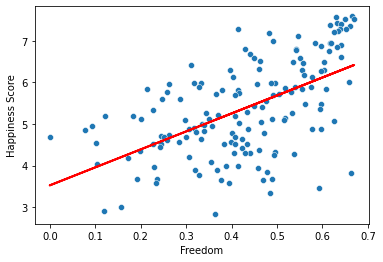

In [24]:
linear_regression_experiment(df_2015, 'Freedom')

Residual Standard Error : 4.81137196950111
r-squared statistic: 0.5244650535503469
Coefficients/Parameters
const                       3.260525
Health (Life Expectancy)    3.356093
dtype: float64
--------------------------------------
t-statistic
const                       18.832302
Health (Life Expectancy)    13.116844
dtype: float64
--------------------------------------
p-value
const                       5.156668e-42
Health (Life Expectancy)    5.788896e-27
dtype: float64
--------------------------------------
Standard Errors
const                       0.173135
Health (Life Expectancy)    0.255861
dtype: float64
--------------------------------------


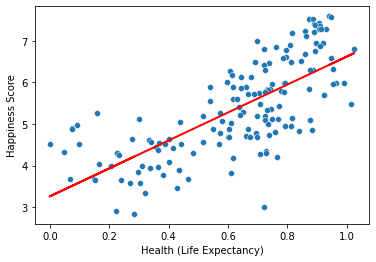

In [25]:
linear_regression_experiment(df_2015, 'Health (Life Expectancy)')

Residual Standard Error : 5.276298628722004
r-squared statistic: 0.1561819206667
Coefficients/Parameters
const                            4.835060
Trust (Government Corruption)    3.769816
dtype: float64
--------------------------------------
t-statistic
const                            36.898130
Trust (Government Corruption)     5.373451
dtype: float64
--------------------------------------
p-value
const                            5.810706e-79
Trust (Government Corruption)    2.763802e-07
dtype: float64
--------------------------------------
Standard Errors
const                            0.131038
Trust (Government Corruption)    0.701563
dtype: float64
--------------------------------------


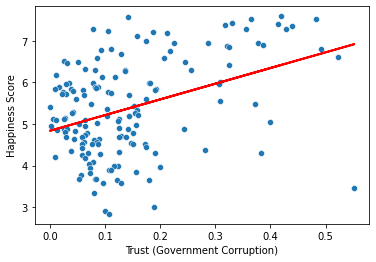

In [26]:
linear_regression_experiment(df_2015, 'Trust (Government Corruption)')


Residual Standard Error : 4.450331114694618
r-squared statistic: 0.548496058174137
Coefficients/Parameters
const     2.290188
Family    3.113424
dtype: float64
--------------------------------------
t-statistic
const      9.854675
Family    13.766333
dtype: float64
--------------------------------------
p-value
const     4.105470e-18
Family    9.918850e-29
dtype: float64
--------------------------------------
Standard Errors
const     0.232396
Family    0.226162
dtype: float64
--------------------------------------


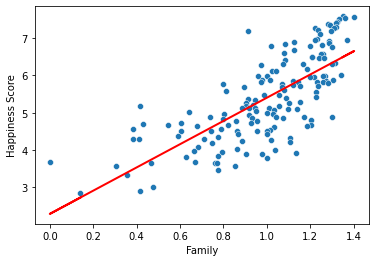

In [27]:
linear_regression_experiment(df_2015, 'Family')
